**Описание проекта.**

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину. 
Шаги для выбора локации обычно такие:
В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
Строят модель для предсказания объёма запасов в новых скважинах;
Выбирают скважины с самыми высокими оценками значений;
Определяют регион с максимальной суммарной прибылью отобранных скважин.
Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error




In [2]:
# определим константы
RANDOM_STATE = np.random.RandomState(42) # константа для random_state
BUDGET = 10000000 # бюджет на развитие в тыс. рублей.
BARREL_PRICE = 450 # цена за тысячу баррелей в тыс. рублей.
DOTS = 500 # количество точек
DOTS_BEST = 200 # количество лучших точек
GOAL = 'product' # целевой параметр

plt.rcParams["figure.figsize"] = (9,7)

In [3]:
# функция для создания датафреймов


list_path_1 = ['/datasets/geo_data_0.csv', '/datasets/geo_data_1.csv', '/datasets/geo_data_2.csv']
list_path_2 = ["C:\\DS\\YP\\S11\\geo_data_0.csv", "C:\\DS\\YP\\S11\\geo_data_1.csv", "C:\\DS\\YP\\S11\\geo_data_2.csv"]
                                              
def generate_data (path_1, path_2):
    i = 0
    list = []
    for path1, path2 in zip(path_1, path_2):
        if os.path.exists(path1):
            x = pd.DataFrame()
            list.append(x)
            list[i] = pd.read_csv(path1)
            i += 1
        elif os.path.exists(path2):
            x = pd.DataFrame()
            list.append(x)
            list[i] = pd.read_csv(path2)
            i += 1
        else:    
            print('Something is wrong')
    return list




In [4]:
# создаём датафреймы
df_list = generate_data(list_path_1, list_path_2)

In [5]:
# вывод первых 5ти строка датафрейма
for data in df_list:
    print(data.head())

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


**Описание данных**

id — уникальный идентификатор скважины;

f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);

product — объём запасов в скважине (тыс. баррелей).

Выведем информаци о датафреймах

In [6]:
# вывод информации о датафремах
i = len(df_list)
for df, j in zip(df_list, range(0, i)):
    print("Информация о df_{}".format(j))
    print()
    print(df.info());
    print()



Информация о df_0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Информация о df_1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Информация о df_2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entrie

Проверка датасетов на пропуски

In [7]:
# проверка на пропуски
i = len(df_list)
for df, j in zip(df_list, range(0, i)):
    print("Пропуски в df_{}".format(j))
    print()
    print(df.isna().sum());
    print()

Пропуски в df_0

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Пропуски в df_1

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Пропуски в df_2

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64



Проверим датасеты на дубликаты

In [8]:
# проверка на наличие дубликатов
i = len(df_list)
for df, j in zip(df_list, range(0, i)):
    print("дубликаты в df_{}".format(j))
    print()
    print(df.duplicated().sum());
    print()

дубликаты в df_0

0

дубликаты в df_1

0

дубликаты в df_2

0



Провелём проверку на наличие неявных дубликатов. Т.к. подразумевается, что id - уникальный параметр, проверка на на подсчёт уникальных параметров выдаст неявные дубликаты. Если попадаются одинаковые id - то это дубликат

In [9]:
# проверка на скрытых дубликатов
i = len(df_list)
for df in df_list:
    print("неявные дубликаты в df_{}".format(j))
    print()
    print(df[df.duplicated('id')]['id'].count());
    print()

неявные дубликаты в df_2

10

неявные дубликаты в df_2

4

неявные дубликаты в df_2

4



Во всех таблицах встречаются одинаковые id. Из повторяющихся значений удалим все кроме первого

In [10]:
# удаление дубликатов
i = len(df_list)
for df in df_list:
    df['id'] = df.drop_duplicates(subset='id')
    


In [11]:
# проверка
i = len(df_list)
for df, j in zip(df_list, range(0, i)):
    print("неявные дубликаты в df_{}".format(j))
    print()
    print(df[df.duplicated('id')]['id'].count());
    print()


неявные дубликаты в df_0

0

неявные дубликаты в df_1

0

неявные дубликаты в df_2

0



Далее визуализируем распределение целевой переменной product. Это позволит понять, если особенности распределения и сходство между распределение в разных регионах.

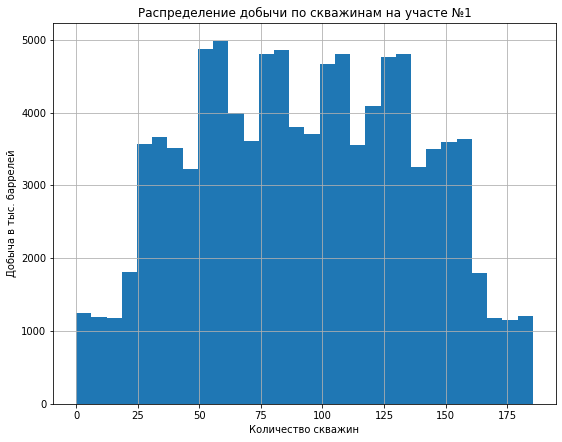

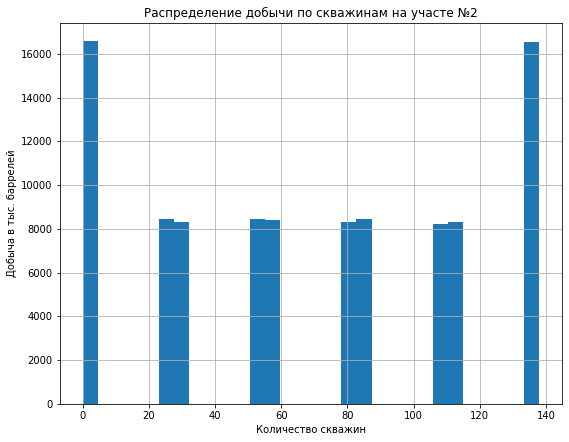

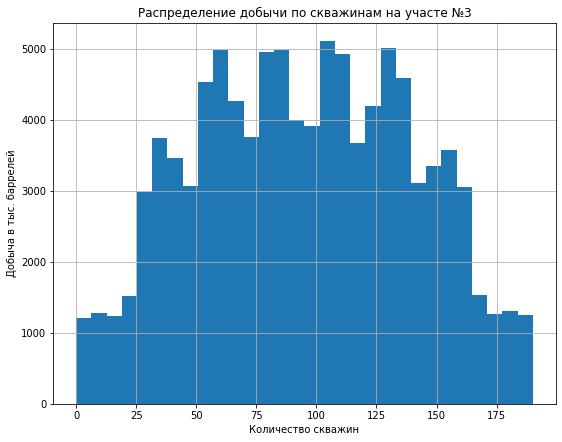

In [12]:
i = 1
for df in df_list:
    df.hist(column='product', bins=30)
    plt.title(f'Распределение добычи по скважинам на участе №{i}')
    plt.xlabel('Количество скважин')
    plt.ylabel('Добыча в тыс. баррелей')
    plt.show()
    i+=1

Распределение в первом и третьем регионах схожи и похоже на нормальное распределение. Во втором регионе много минимальных и максимальных значений, между ними множество схожих. Это распределение выглядит подозрительно, как искусственно сгенерированное. 

Далее проверим признаки на корреляцию

In [13]:
# проверка на корреляцию
i = len(df_list)
for df, j in zip(df_list, range(0, i)):
    print("корреляция в df_{}".format(j))
    print()
    print(df.corr());
    print()

корреляция в df_0

               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000

корреляция в df_1

               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000

корреляция в df_2

               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000



Во всех регионах корреляция целевого признака, 'product', выше всего с признаком 'f2', во втором регионе корреляция с признаком 'f2' аномально высокая, по сути, целевой признак почти полностью зависит от 'f2'

Перед проверкой модели, удалим признаки, которые нам пока не понадобятся

In [14]:
# копирование датафрейма перед удаление лишнего признака
i = len(df_list)
for df, j in zip(df_list, range(0, i)):
    locals()['df_old_' + str(j)] = df.copy()

In [15]:
# проверка
df_old_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [16]:
# удаление признака который нам пока не нужен
i = len(df_list)
for df, j in zip(df_list, range(0, i)):
    df_list[j] = df.drop('id', axis=1)
    

In [17]:
# проверка удаления
i=0
for df in df_list:
    print(f"df_{i}:")
    print(df.head(1))
    print()
    i+=1

df_0:
         f0        f1       f2     product
0  0.705745 -0.497823  1.22117  105.280062

df_1:
          f0     f1        f2   product
0 -15.001348 -8.276 -0.005876  3.179103

df_2:
         f0        f1        f2    product
0 -1.146987  0.963328 -0.828965  27.758673



Считаем данные достаточно подготовленными, пропусков и дубликатов нет, все данных в датафреймах - числовые

## Исследование задачи

Есть желание объедить датафреймы для удобства и большей базы для обучения модели. Но на разных месторождениях могут быть разные зависимости между параметрами и поэтому объединять их не будем.
Разделим датафреймы на обучающую и целевую выборки, затем на тренировочную и валдиную, после чего обучим модели.

In [18]:
# разбивка датафрейма на обучающие и целевые признаки
def take_features (data, attribute):
        features = data.drop(attribute, axis=1)
        return features
    
def take_target (data, attribute):
        target = data[attribute]
        return target

In [19]:
i = 0
list_features = []
list_target = []
for df in df_list:
    x = take_features(df, GOAL)
    y = take_target(df, GOAL)
    list_features.append(x)
    list_target.append(y)
    i += 1
    


In [20]:
i = 0
for features in list_features:
    print(f'df_{i}:')
    print(features.head(1))
    print()
    i += 1

df_0:
         f0        f1       f2
0  0.705745 -0.497823  1.22117

df_1:
          f0     f1        f2
0 -15.001348 -8.276 -0.005876

df_2:
         f0        f1        f2
0 -1.146987  0.963328 -0.828965



Разобьём выборки на тренировочную и валидную

In [21]:
def take_train_and_valid(features, target):
    features_train, features_valid, target_train, target_valid =\
    train_test_split(features, target, test_size=0.25, random_state=RANDOM_STATE)
    return features_train, features_valid, target_train, target_valid


    

In [22]:
# разбивка датафрейма на обучющую и валидную выборки
list_features_train = []
list_features_valid = []
list_target_train = []
list_target_valid = []
for features, target, j in zip(list_features, list_target, range(0, len(list_features))):
    features_train, features_valid, target_train, target_valid =\
    take_train_and_valid(features, target)
    list_features_train.append(features_train)
    list_features_valid.append(features_valid)
    list_target_train.append(target_train)
    list_target_valid.append(target_valid)


In [23]:
# проверка
i = 0
for features_train, features_valid, target_train, target_valid\
in zip(list_features_train, list_features_valid, list_target_train, list_target_valid):
    print(f'features_train_{i}:') 
    print(features_train.head(1))
    print()
    print(f'features_valid_{i}:')
    print(features_valid.head(1))
    print()
    print(f'target_train,_{i}:')
    print(target_train.head(1))
    print()
    print(f'target_valid_{i}:')
    print(target_valid.head(1))
    print()
    i+=1
    

features_train_0:
             f0        f1        f2
98980  1.611925 -0.151874  1.221668

features_valid_0:
             f0        f1        f2
75721  0.599283 -0.557623  2.121187

target_train,_0:
98980    105.179287
Name: product, dtype: float64

target_valid_0:
75721    122.07335
Name: product, dtype: float64

features_train_1:
             f0        f1       f2
45440  6.496237 -8.423664  5.00011

features_valid_1:
             f0        f1        f2
84348 -4.290822 -0.112987  4.997867

target_train,_1:
45440    134.766305
Name: product, dtype: float64

target_valid_1:
84348    137.945408
Name: product, dtype: float64

features_train_2:
             f0        f1        f2
64847  0.786865 -0.636662 -4.198678

features_valid_2:
             f0        f1        f2
95120 -0.888283 -0.136273  3.911332

target_train,_2:
64847    130.867512
Name: product, dtype: float64

target_valid_2:
95120    12.129573
Name: product, dtype: float64



In [24]:
i = 0
list_predicted = []
for features_train, features_valid, target_train, target_valid\
in zip(list_features_train, list_features_valid, list_target_train, list_target_valid):
    model = LinearRegression() # объявление модели
    model.fit(features_train, target_train) # тренировка модли
    predict = model.predict(features_valid) # предсказание модели
    mse = mean_squared_error(target_valid, predict)
    rmse = mse ** 0.5 # расчет MSE и RMSE

    print(f"Linear Regression для региона №{i+1}")
    print(f"MSE_{i} =", mse)
    print(f"RMSE_{i} =", rmse)
    print("Средний запас сырья:", target_valid.mean())
    print("Среднеедний запас предсказанного сырья:", predict.mean())
    print()
    i += 1
    
    # создаём выборку из предсказаний
    predicted_series = pd.Series(predict, index = target_valid.index)
    list_predicted.append(predicted_series)


Linear Regression для региона №1
MSE_0 = 1425.5608700093812
RMSE_0 = 37.75660035026169
Средний запас сырья: 92.32595637084387
Среднеедний запас предсказанного сырья: 92.39879990657768

Linear Regression для региона №2
MSE_1 = 0.7920060236213451
RMSE_1 = 0.8899472027156135
Средний запас сырья: 68.59968732439852
Среднеедний запас предсказанного сырья: 68.58780312701154

Linear Regression для региона №3
MSE_2 = 1619.0443657160029
RMSE_2 = 40.23735038140562
Средний запас сырья: 95.03521872476617
Среднеедний запас предсказанного сырья: 95.09230341410031



Средняя квадратичная ошибка минимальна для рассчета модели во втором регионе. Это наверняка связано со странным наполнением датафрейма для второго региона. Для первого и третьего она около 40тыс. баррелей.
При этм средние запасы предсказанного сырья в первом и третьем регионе примерно равны и на треть выше чем во втором регионе. В моделях для всех трёх регионов средний запас сырья почти не отличается от среднего запаса предсказзного сырья.

## Подготовка к рассчёту прибыли

Рассчитаем какой объем сырья необходим для безубыточной добычи в регионе.

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

Бюджет на разработку скважин в регионе — 10 млрд рублей.

При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

Для безубычтоной добычи считаем что доход от добычы в двухста лучших точках должен быть больше или равен бюджету.

In [25]:
# cчитаем средний доход с точки для безубыточности
mean_income = BUDGET / DOTS_BEST
print("Средний доход с с точке для безубыточности:", mean_income)

# считаем средний объем нефти в точки для безубыточности по текущим ценам
mean_stock = mean_income / BARREL_PRICE
print("Средний объем нефти в точке для безубыточности по текущим ценам:", mean_stock)

Средний доход с с точке для безубыточности: 50000.0
Средний объем нефти в точке для безубыточности по текущим ценам: 111.11111111111111


Для безубыточной рзработки в регионе необходимо, чтобы запас сырья в 200 лучших точках было выше 111 тыч. баррелей. Среднее по всем трём данным регионам пока ниже. Но у нас пока есть среднее по всем точкам в регионе, а не по лучшим.

Машинное обучение в данном проекта нужно для расчёта среднего значения запасов по региону, даже если сведения в регионе не полные. Для проверки возможнен ли выхож на безубыточную добычу в региону нужно выбрать 200 лучших точек из всего региона для добычи. Для этого нужно провести бустрорапирование данных.

Далее напишим функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели.

## Создание функции для расчёта прибыли по выбранным скважинам и предсказаниям модели

 1. Выберем скважины с максимальными значениями предсказаний. 
 2. Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.
 3. Рассчитаем прибыль для полученного объёма сырья.


In [26]:
# создание функции расчёта прибыли
def profitability (target, predict, budget, price, count): # в параметры вкладывам предсказанные значения и стоимость сырья
    predict_sorted = predict.sort_values(ascending=False) # находим 200 самых прибыльных точек по предсказанным значениям
    best = target[predict_sorted.index][:count] # выбираем лучшие но по фактическим индексам    
    best_sum = best.sum() # суммируем объёмы сырья в лучших точках
    profit = best_sum * price - BUDGET # находим прибыль для полученного объёма сырья
    return profit

## Расчёт рисков и прибыли для каждого региона

 Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
 
 Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
 
 После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбираем регион с наибольшей средней прибылью.

In [27]:
# Нахождение прибыльности точки по реальным значениями
def revenue_of_region (list_target, list_predictions):
    
    values_target = []
    list_target = pd.Series(list_target)
    list_predictions = pd.Series(list_predictions)
    i = 0
    for target, predict in zip(list_target, list_predictions):
        values = []    
        for j in range(1000):
            target_subsample = target.sample(n=500,
                                      replace=True,
                                      random_state=RANDOM_STATE) # генерация подвыборки, выбираем из 500 точек
            predict_subsample = predict[target_subsample.index]
            profit = profitability(target_subsample, predict_subsample, BUDGET, BARREL_PRICE, DOTS_BEST) # нахождение прибыльности точки
            values.append(profit)
        values=pd.Series(values)



        values_mean = values.mean() # средняя доходность точке

        lower_target = values.quantile(0.025) # нижняя граница доверительного 95% интервала
        upper_target = values.quantile(0.975) # верхняя граница доверительного 95% интервала

        print(f"В {i+1}м регионе:")

        print("Средняя прибыль по реальным значениям:", values_mean, "тыс. руб") # вычитаем бюджет из дохода
        print()

        print("Нижняя граница доверительного 95% интервала по реальным значениям:", lower_target, "тыс. руб")
        print()

        print("Верхняя граница доверительного 95% интервала по предсказанным значениям:", upper_target, "тыс. руб")

        # Нахождение доли убыточных разроботок    
        print(f"Доля убыточных разработок на реальной выборке в регионе №{i+1}", len(values[values<0])/len(values))
        print("\n")
        
        i+=1

Расчитаем среднюю прибыль, доверительный интвервал и риск убытков по реигонам

In [28]:
# расчёт средней прибыли, доверительного интвервала и риска убытков по реигонам
revenue_of_region(list_target_valid, list_predicted)


В 1м регионе:
Средняя прибыль по реальным значениям: 440446.61953533685 тыс. руб

Нижняя граница доверительного 95% интервала по реальным значениям: -129698.2638755694 тыс. руб

Верхняя граница доверительного 95% интервала по предсказанным значениям: 980351.5347801712 тыс. руб
Доля убыточных разработок на реальной выборке в регионе №1 0.058


В 2м регионе:
Средняя прибыль по реальным значениям: 489036.1460885979 тыс. руб

Нижняя граница доверительного 95% интервала по реальным значениям: 63878.578768579944 тыс. руб

Верхняя граница доверительного 95% интервала по предсказанным значениям: 900130.4555331349 тыс. руб
Доля убыточных разработок на реальной выборке в регионе №2 0.01


В 3м регионе:
Средняя прибыль по реальным значениям: 343559.87128002784 тыс. руб

Нижняя граница доверительного 95% интервала по реальным значениям: -210907.75068006336 тыс. руб

Верхняя граница доверительного 95% интервала по предсказанным значениям: 884771.2145797132 тыс. руб
Доля убыточных разработок на реал

## В итоге
В этом проекте мы обучили модель логистической регрессии для пребсказания запасов нефти в скважине по параметрам скыважины дял трёх регионов. Самая точная модель получисась по второму региону. Далее провели подготовку для расчёта прибыльности скважин в регионе. Так как бюджет на разработку ограничен, мы выбрали 200 самых перспективных скважин и методом Бутстреп подсчитали перспективы прибыльности добычи в каждом из трёх регионов. Нашли среднюю прибыль, 95%-й доверительный интервал и риск убытков. Критичный порог риска убытков равен 2,5% Критический порог превышен только во первом регионе. Самый перспективный регион - 2й из трёх. Его средняя прибыль равна 0,48 млрд. руб., что выше чем у остальных двух и минимальный из регионов риск убытков. У первого региона риск убытов превышает пороговое значение. Из этих данных можно сделать вывод, что 2й регион являтеся самым перспективным

В итоге у нас есть модель для прогнозирования и расчёта прибыльности региона по данных с скважин.